Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.
https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import re

In [8]:
df=pd.read_csv(r"instagram_reach.csv")
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [9]:
df['Time since posted'].str[2:].value_counts()

hours     95
 hours     5
Name: Time since posted, dtype: int64

In [10]:
df['Time since posted']=df['Time since posted'].str[:2]

In [62]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.probability import FreqDist

def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove articles (a, an, the)
    text = re.sub(r'\b(?:a|an|the)\b', '', text, flags=re.IGNORECASE)
    # Remove words with less than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Remove slashes
    text = text.replace('/', '')
    # Remove hashtags
    text = text.replace('#', '')
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(tokens)

    # Relevant terms or dictionary of computer-related words
    computer_terms = ['computer', 'technology', 'programming', 'software', 'hardware', 'network', 'database', 'algorithm', 'internet', 'coding', 'web', 'developer', 'artificial intelligence', 'machine learning']

    # Remove pronouns, verbs, conjunctions, and non-computer-related words
    filtered_words = [word for word, tag in tagged_words if (tag not in ['PRP', 'PRP$', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'CC']) and (word.lower() in computer_terms)]

    # Join the filtered words back into a cleaned text
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

text = 'We all know where it’s going. We just have to\xa0#workresponsibly\xa0to postpone the date. This actually made into a business slide\xa0#deck\xa0.#mac\xa0#macintosh#sayhello\xa0#apple\xa0#stevejobs\xa0#ai\xa0#evolution#artificialintelligence\xa0#machinelearning#terminator\xa0#illbeback\xa0#technology#computerevolution\xa0#computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology\xa0#vr\xa0#ar\xa0#robot#robots\xa0#t2\xa0#businessdeck\xa0#businessslides#illustration\xa0#sketches\xa0#drawing'

cleaned_text = clean_text(text)

# Tokenize the cleaned text
tokens = word_tokenize(cleaned_text)

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Print the most frequent words
most_common_words = freq_dist.most_common(5)
for word, frequency in most_common_words:
    print(word, frequency)


In [69]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [70]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Function to process the caption text
def process_caption(caption):
    # Tokenize the caption into words
    tokens = word_tokenize(caption)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the processed tokens back into a string
    processed_caption = ' '.join(tokens)

    return processed_caption

# Apply the process_caption function to the 'Caption' column
df['Processed Caption'] = df['Caption'].apply(process_caption)

# Print the processed captions
print(df['Processed Caption'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     # DataScientist ? > > @ MikeQuindazzi > > # Ma...
1     know ’ going . # workresponsibly postpone date...
2     Alexander Barinov : 4 year CFO multinationals ...
3                                                  sfad
4     Ever missed call phone charging ? system notif...
                            ...                        
95    328 S. Wetherly Drive , Beverly Hills , CA 902...
96    Credit @ tristankappel find dvlp follow @ dvlp...
97    coming Best 21 Books change mind Life , Money ...
98    ’ paid move dirt . ’ excavating placing . fill...
99                     Obtén tu tienda en línea ahora .
Name: Processed Caption, Length: 100, dtype: object


In [77]:
import re

# Function to remove links and punctuation
def clean_text(text):
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

# Function to remove verbs, # symbols, >> and << symbols, non-usable terms, and "@" mentions
def process_caption(text):
    # Remove verbs
    text = ' '.join([word for word in text.split() if nltk.pos_tag([word])[0][1] != 'VB'])
    
    # Remove # symbols
    text = text.replace('#', '')
    
    # Remove >> and << symbols
    text = text.replace('>>', '').replace('<<', '')
    
    # Remove non-usable terms
    non_usable_terms = ['...', 'etc.']
    text = ' '.join([word for word in text.split() if word not in non_usable_terms])
    
    # Remove "@" mentions with the corresponding name
    text = re.sub(r'@\w+', '', text)
    
    return text

# Apply the cleaning and processing functions to the 'Processed Caption' column
df['Processed Caption'] = df['Processed Caption'].apply(clean_text).apply(process_caption)

# Print the 'Processed Caption' column
print(df['Processed Caption'])


0     DataScientist MikeQuindazzi MachineLearning AI...
1     going workresponsibly postpone date actually m...
2     Alexander Barinov 4 year CFO multinationals 10...
3                                                  sfad
4     Ever missed call phone charging system notify ...
                            ...                        
95    328 S Wetherly Drive Beverly Hills CA 90212 be...
96    Credit tristankappel dvlp dvlp_search New work...
97    coming Best 21 Books change mind Life Money se...
98    paid move dirt excavating placing fill properl...
99                       Obtén tu tienda en línea ahora
Name: Processed Caption, Length: 100, dtype: object


In [11]:
featureVector = np.array(df[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(df['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [12]:
#diving targets by max values
targets = targets/maxValLikes

In [13]:
# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

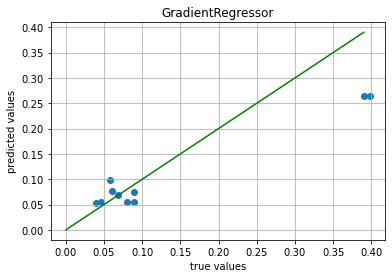

In [15]:
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

From Benchmarks this seems the model though not perfect is still workable. Lets do some Predictive modelling on the following cases:

Case 1.) You have 100 followers and time passes by one hour for 24 hours

case 2.) You have 100 followers and you Can 100 follower every hour for 24 hours

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = np.array(df[["Followers"]])
y = np.array(df["Likes"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
y\.shape

(100,)

In [28]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.16128913504989717

In [16]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

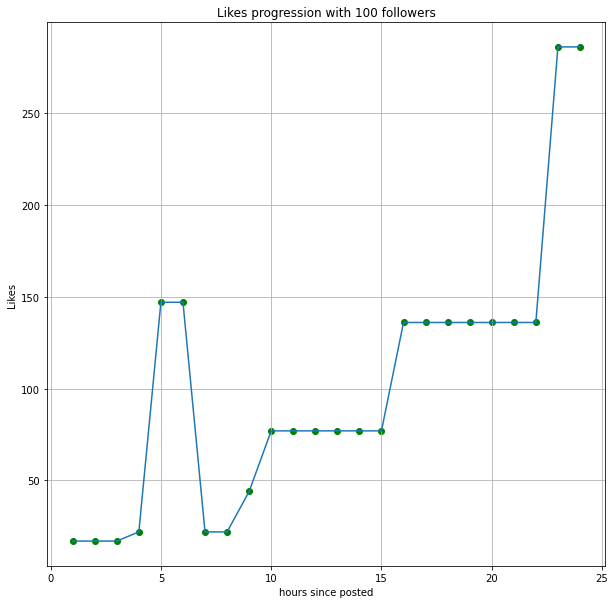

In [17]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

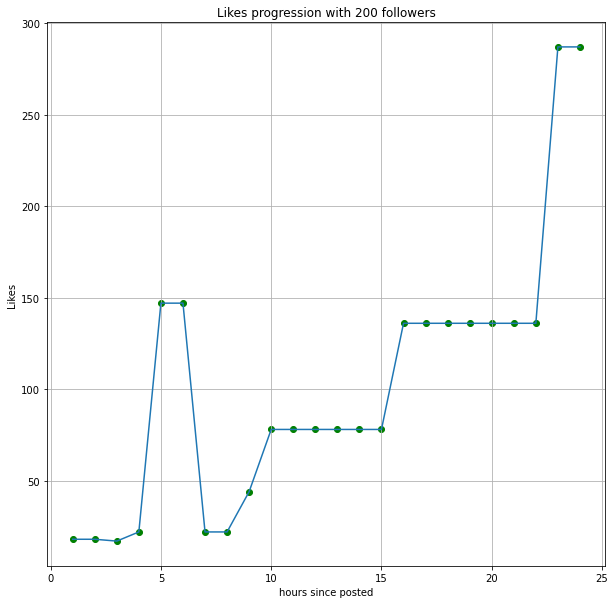

In [18]:
## let double the Number of Followers
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

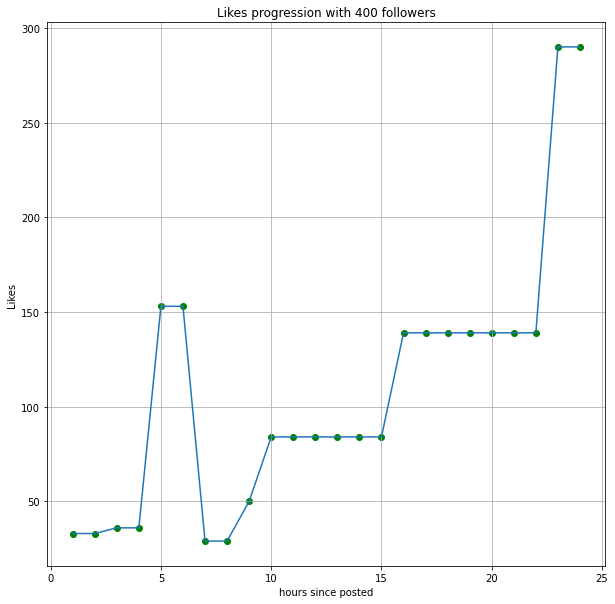

In [19]:
## let 4X the Number of Followers
PredictionsWithConstantFollowers(gbr, 400, stdSc, maxValLikes)

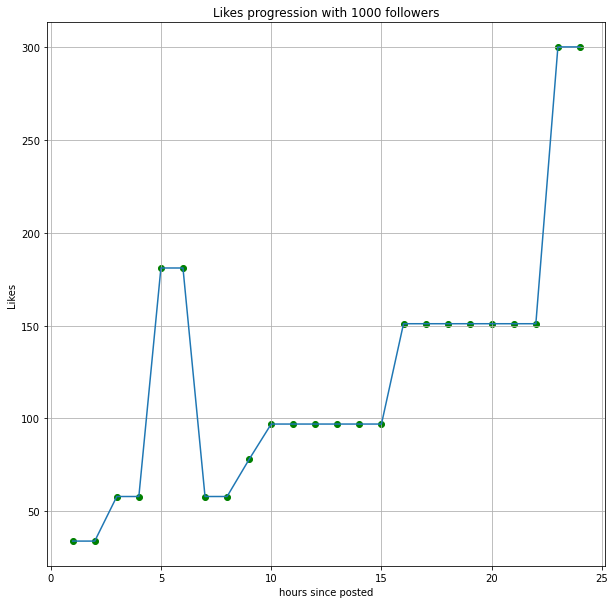

In [20]:
## let 10X the Number of Followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

According to this model we can infer one thing, that is, If you have higher number of followers your post will gain more Likes early in its life time, but maximum likes doesnt increase that much, here 20X the number followers yeild only about 20% increase in likes

In [22]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

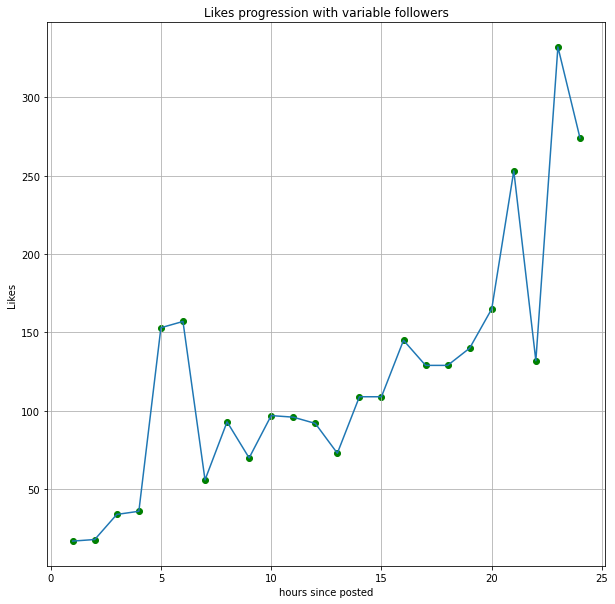

In [23]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)

If our predictive model is right, and case 2 is true then around 15 hours posts like will grow exponentially !!